In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.0 anndata==0.7.5 umap==0.5.1 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
results_file = 'result/210816_CS23_analysis.h5ad'

In [4]:
adata = sc.read_h5ad('write/CS23_processing.h5ad')           

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


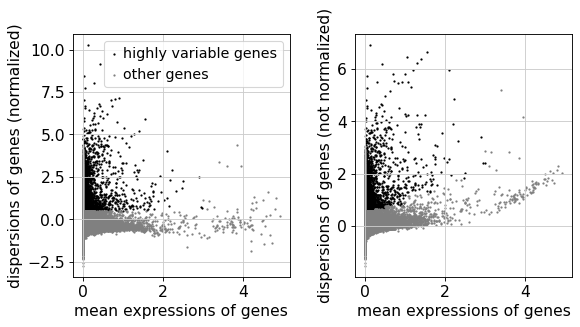

In [6]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [7]:
adata.raw = adata

In [8]:
adata = adata[:, adata.var.highly_variable]

/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [9]:
adata

View of AnnData object with n_obs × n_vars = 8020 × 2603
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'doublet_info_colors', 'log1p', 'hvg'

In [10]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'])

regressing out ['total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb']
    sparse input is densified and may lead to high memory use
    finished (0:00:12)


In [11]:
sc.pp.scale(adata, max_value=10)

In [12]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
/home/analysis/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
    with n_comps=50
    finished (0:00:01)


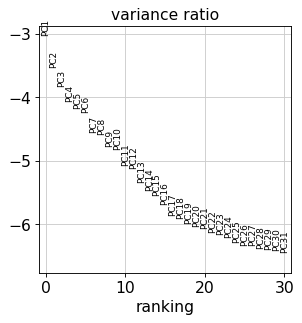

In [13]:
sc.pl.pca_variance_ratio(adata, log=True)

In [14]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 8020 × 2603
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'doublet_info_colors', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [16]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


In [17]:
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden_0.4")
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata, resolution = 0.8, key_added = "leiden_0.8")
sc.tl.leiden(adata, resolution = 1.0, key_added = "leiden_1.0")
sc.tl.leiden(adata, resolution = 1.2, key_added = "leiden_1.2")
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")

running Leiden clustering
    finished: found 13 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 19 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden_0.8', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 26 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 28 clusters and added
    'leiden_1.2', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 31 clusters and added
    'leiden_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


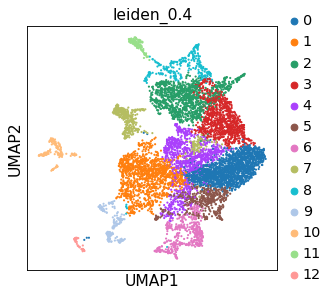

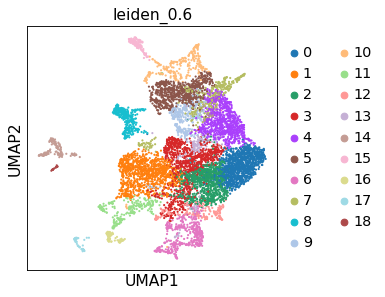

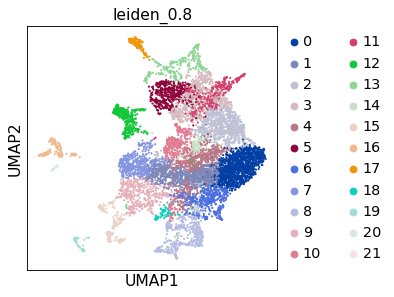

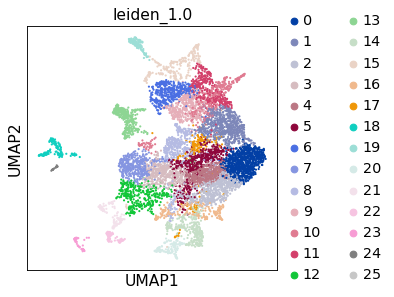

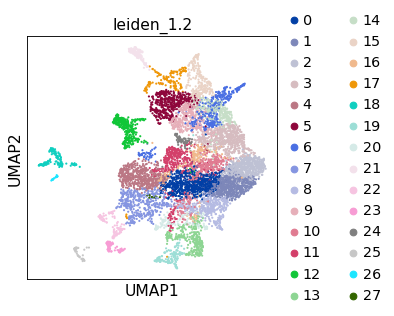

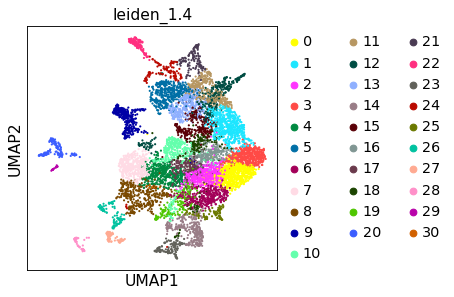

In [18]:
sc.pl.umap(adata, color='leiden_0.4')
sc.pl.umap(adata, color='leiden_0.6')
sc.pl.umap(adata, color='leiden_0.8')
sc.pl.umap(adata, color='leiden_1.0')
sc.pl.umap(adata, color='leiden_1.2')
sc.pl.umap(adata, color='leiden_1.4')

ranking genes
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)


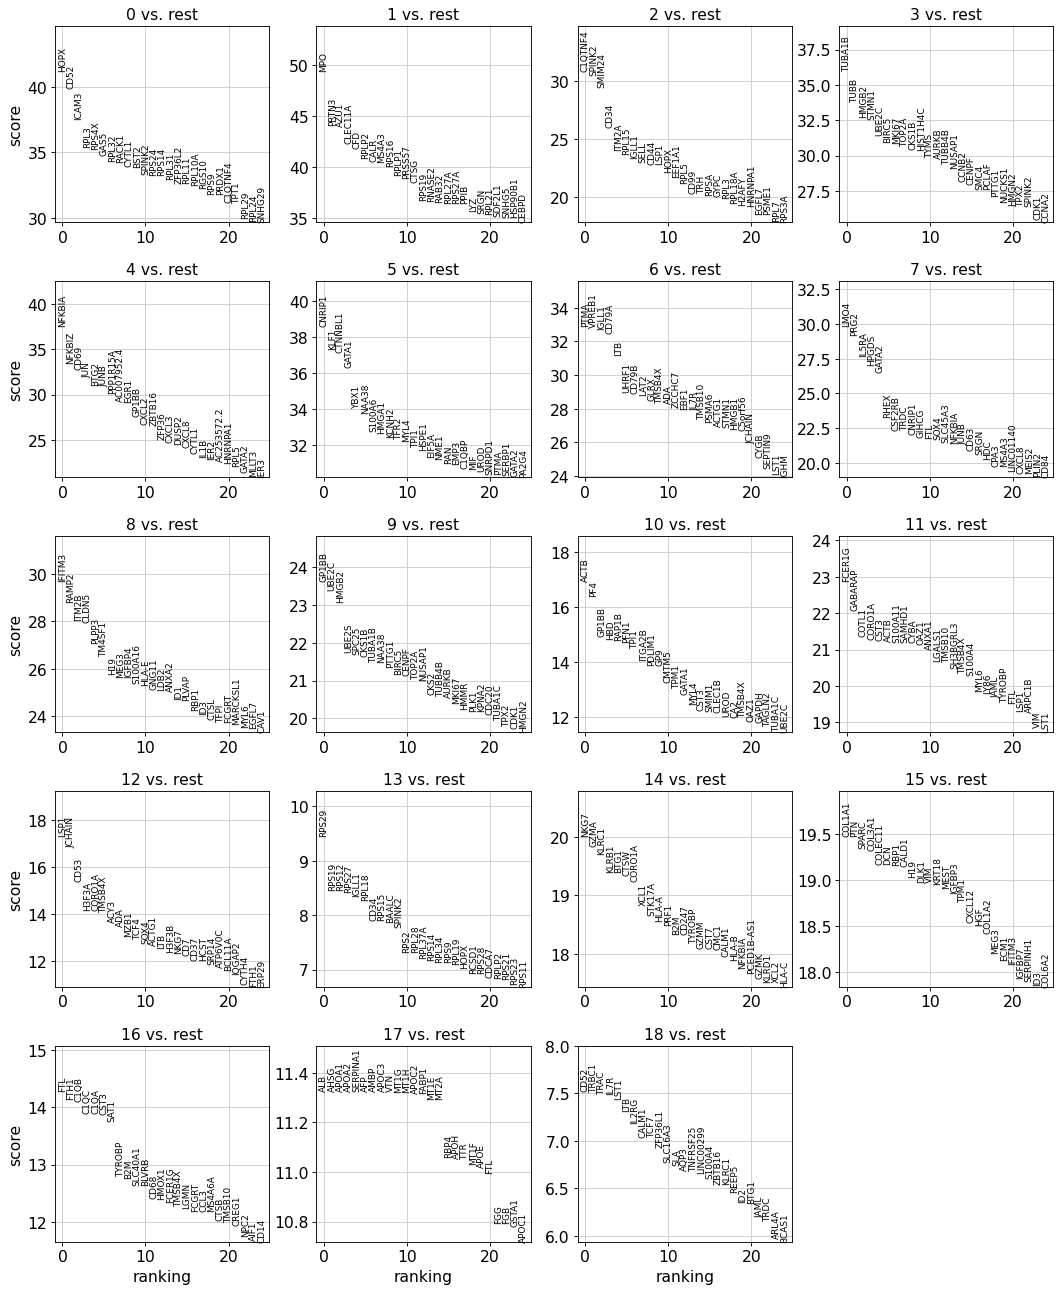

In [19]:
sc.tl.rank_genes_groups(adata, 'leiden_0.6', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon")

In [20]:
group15 = (sc.get.rank_genes_groups_df(adata, group="15", key = "wilcoxon")
          .set_index("names", drop=False))

In [21]:
group15.head()

,names,scores,logfoldchanges,pvals,pvals_adj
names,,,,,
COL1A1,COL1A1,19.483377,10.845231,1.519186e-84,1.712102e-80
PTN,PTN,19.479736,11.001223,1.631195e-84,1.712102e-80
SPARC,SPARC,19.351748,7.301198,1.970433e-83,1.378778e-79
COL3A1,COL3A1,19.328190,10.807668,3.111407e-83,1.632866e-79
COLEC11,COLEC11,19.175169,10.951426,5.967399e-82,1.947827e-78


In [22]:
group15.to_csv('210816_group15_wilcoxon.tsv', sep='\t', index = False)

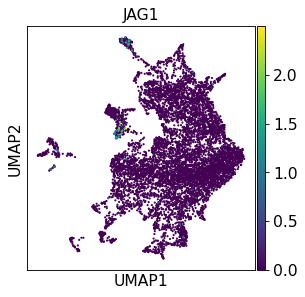

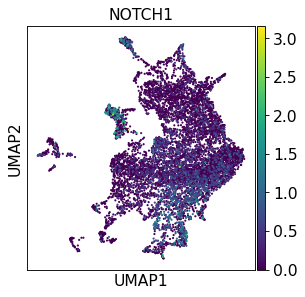

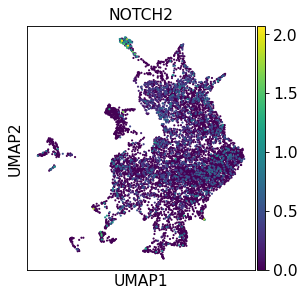

In [23]:
sc.pl.umap(adata, color='JAG1')
sc.pl.umap(adata, color='NOTCH1')
sc.pl.umap(adata, color='NOTCH2')

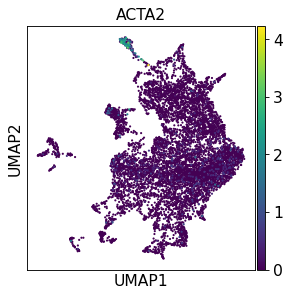

In [24]:
sc.pl.umap(adata, color='ACTA2')

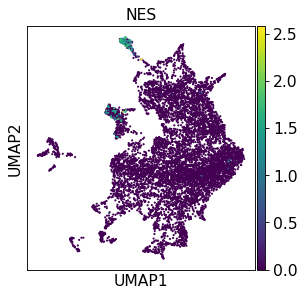

In [25]:
sc.pl.umap(adata, color='NES')

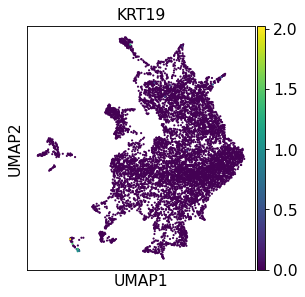

In [26]:
sc.pl.umap(adata, color='KRT19')

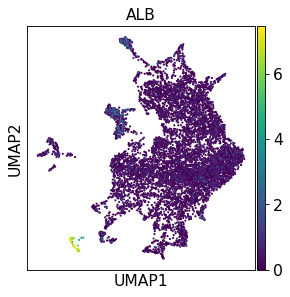

In [27]:
sc.pl.umap(adata, color='ALB')

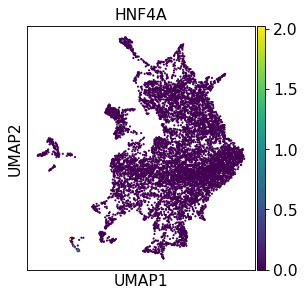

In [28]:
sc.pl.umap(adata, color='HNF4A')

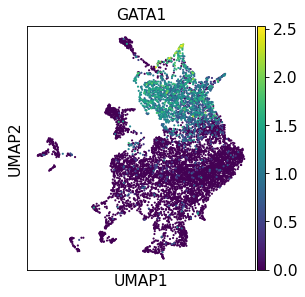

In [29]:
sc.pl.umap(adata, color='GATA1')

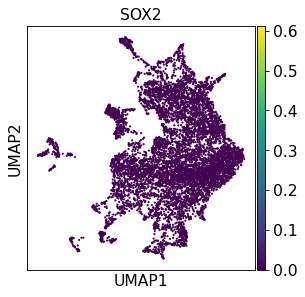

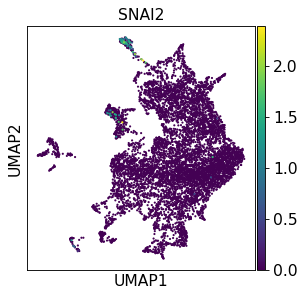

In [30]:
sc.pl.umap(adata, color='SOX2')
sc.pl.umap(adata, color='SNAI2')

In [31]:
adata.obs.groupby("leiden_0.6").apply(len)

leiden_0.6
0     1165
1      960
2      892
3      881
4      806
5      695
6      415
7      381
8      330
9      321
10     252
11     211
12     167
13     148
14     136
15     129
16      69
17      43
18      19
dtype: int64

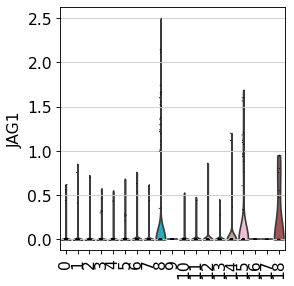

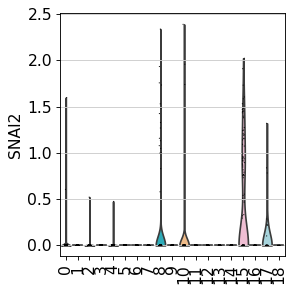

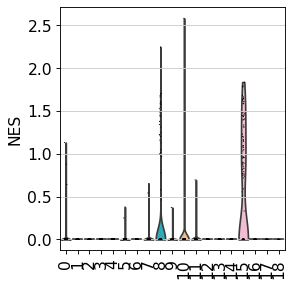

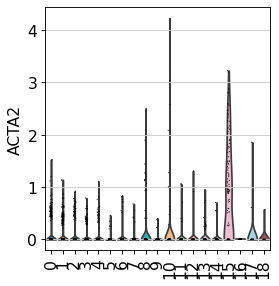

In [32]:
sc.pl.violin(adata, ['JAG1'], groupby='leiden_0.6', rotation = 90)
sc.pl.violin(adata, ['SNAI2'], groupby='leiden_0.6', rotation = 90)
sc.pl.violin(adata, ['NES'], groupby='leiden_0.6', rotation = 90)
sc.pl.violin(adata, ['ACTA2'], groupby='leiden_0.6', rotation = 90)

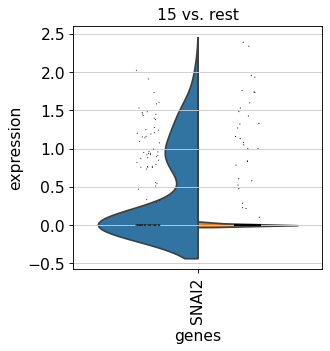

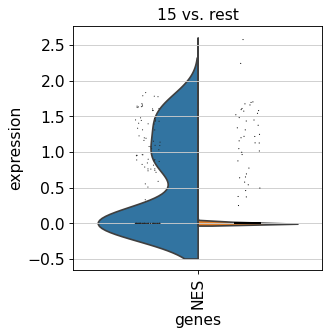

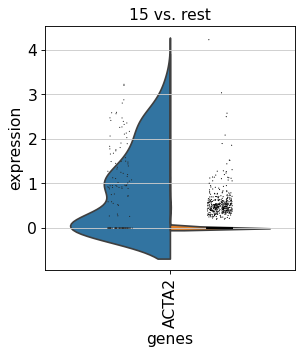

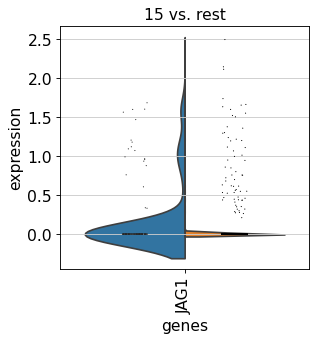

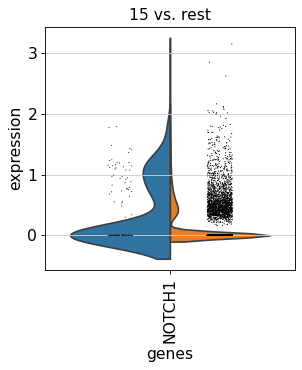

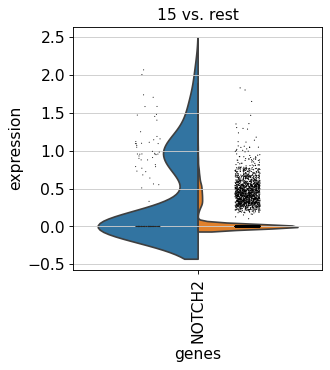

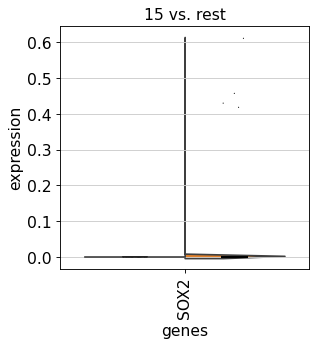

In [33]:
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['SNAI2'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['NES'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['ACTA2'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['JAG1'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['NOTCH1'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['NOTCH2'], key = "wilcoxon")
sc.pl.rank_genes_groups_violin(adata, groups='15', gene_names = ['SOX2'], key = "wilcoxon")

In [34]:
adata.write(results_file)